# **Part I**

# **MobileNetV2**


# **Step 1. Import Necessary Libraries**



In [ ]:
import os # This line imports the Python os module, which provides a way to interact with the operating system. It allows you to perform various operating system-related tasks like file and directory manipulation.
import numpy as np # This line imports the NumPy library and aliases it as np. NumPy is a powerful numerical computing library for Python, commonly used for array manipulation and mathematical operations.
import tensorflow as tf # This line imports the TensorFlow library and aliases it as tf. TensorFlow is an open-source machine learning framework developed by Google for building and training machine learning models.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # This line imports the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module. ImageDataGenerator is a utility class in TensorFlow Keras used for generating batches of augmented image data during model training.
from tensorflow.keras.applications import MobileNetV2 # This line imports the MobileNetV2 pre-trained deep learning model from the tensorflow.keras.applications module. MobileNetV2 is a lightweight deep convolutional neural network architecture commonly used for image classification tasks.
from tensorflow.keras.models import Model # This line imports the Model class from the tensorflow.keras.models module. The Model class in TensorFlow Keras is used to instantiate models for training, evaluation, and inference.
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D # This line imports the Dense and GlobalAveragePooling2D layer classes from the tensorflow.keras.layers module. These are commonly used layers in neural network architectures. Dense is a fully connected layer, and GlobalAveragePooling2D is a pooling layer that computes the average value of each feature map across the spatial dimensions.
from tensorflow.keras.optimizers import Adam # This line imports the Adam optimizer from the tensorflow.keras.optimizers module. Adam is an adaptive learning rate optimization algorithm commonly used for training deep learning models.


# **Step 2. Set Up Dataset Paths**



In [ ]:
train_dir = '/content/train' # This variable stores the path to the directory containing training data. In this case, it's set to '/content/train', suggesting that the training data is located in a directory named "train" within the "/content" directory.
validation_dir = '/content/validation' # This variable stores the path to the directory containing validation data. It's set to '/content/validation', indicating that the validation data is located in a directory named "validation" within the "/content" directory.
test_dir = '/content/test' # This variable stores the path to the directory containing test data. It's set to '/content/test', implying that the test data is located in a directory named "test" within the "/content" directory.


# **Step 3. Preprocess the Data**



In [ ]:
# Use ImageDataGenerator to load and preprocess images. 
# MobileNetV2 expects input images of size 224x224 pixels, and preprocessing is required to match the model's training conditions.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# This line creates an ImageDataGenerator object named train_datagen, which will be used to generate augmented training data.
# Various augmentation parameters are provided within the parentheses to specify how the training images will be modified during training. These parameters include:
# rescale=1./255: Rescales the pixel values of images to the range [0, 1].
# rotation_range=40: Randomly rotates the images by up to 40 degrees.
# width_shift_range=0.2: Randomly shifts the images horizontally by up to 20% of the total width.
# height_shift_range=0.2: Randomly shifts the images vertically by up to 20% of the total height.
# shear_range=0.2: Applies random shearing transformations.
# zoom_range=0.2: Randomly zooms into the images by up to 20%.
# horizontal_flip=True: Randomly flips the images horizontally.
# fill_mode='nearest': Specifies the method used for filling in newly created pixels resulting from transformations.

test_datagen = ImageDataGenerator(rescale=1./255)

# This line creates an ImageDataGenerator object named test_datagen, which will be used to preprocess test data.
# Only one parameter is provided:
# rescale=1./255: Rescales the pixel values of images to the range [0, 1], similar to the training data generator.

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# This line creates a generator for yielding batches of training data from the directory specified by train_dir.
# The flow_from_directory method is called on the train_datagen object.
# Parameters passed to flow_from_directory include:
# train_dir: Specifies the directory containing the training images.
# target_size=(224, 224): Resizes the images to have a width and height of 224 pixels.
# batch_size=32: Sets the batch size for training data to 32.
# class_mode='categorical': Indicates that the labels are provided in categorical format (one-hot encoded).

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# This line creates a generator for yielding batches of validation data from the directory specified by validation_dir.
# Similar to the previous line, the flow_from_directory method is called on the test_datagen object.
# Parameters passed to flow_from_directory are similar to those for train_generator, including validation_dir, target_size, batch_size, and class_mode.

Found 750 images belonging to 5 classes.
Found 159 images belonging to 5 classes.



# **Step 4. Load MobileNetV2 and Add Custom Layers**



In [ ]:
# Load MobileNetV2 with pre-trained weights and add your custom layers on top for the classification task.

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# This line initializes the MobileNetV2 model with pre-trained weights from the ImageNet dataset. The weights parameter is set to 'imagenet'.
# include_top=False ensures that the fully connected layers at the top of the MobileNetV2 architecture are not included, leaving only the convolutional base.
# input_shape=(224, 224, 3) specifies the input shape for the model. Images are expected to have dimensions 224x224 pixels with 3 channels (RGB).

base_model.trainable = False

# This line freezes the weights of the pre-trained MobileNetV2 model, preventing them from being updated during training. This is done to use the pre-trained features without modifying them.

x = base_model.output # This line sets the variable x to the output tensor of the MobileNetV2 model. This tensor represents the features extracted from the input images by the pre-trained MobileNetV2 model.
x = GlobalAveragePooling2D()(x) # This line applies a global average pooling operation to the x tensor. Global average pooling reduces the spatial dimensions of the tensor while retaining important features by taking the average of each feature map.
x = Dense(1024, activation='relu')(x) # This line adds a fully connected Dense layer with 1024 units and ReLU activation function on top of the global average pooling layer. This layer is intended to capture higher-level features from the flattened output of the global average pooling layer.
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x) # This line adds the final output layer to the model. It is a Dense layer with the number of units equal to the number of classes in the training data (retrieved from train_generator.class_indices) and softmax activation function. This layer computes the probability distribution over the classes.

model = Model(inputs=base_model.input, outputs=predictions)

# This line constructs the final model by specifying the inputs and outputs. It creates a Model object where the input is the input layer of the pre-trained MobileNetV2 model (base_model.input) and the output is the predictions tensor.

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# This line compiles the model and configures its training process.
# optimizer=Adam(lr=0.0001) specifies the Adam optimizer with a learning rate of 0.0001.
# loss='categorical_crossentropy' specifies the loss function used during training, which is categorical cross-entropy since the problem involves multi-class classification.
# metrics=['accuracy'] specifies the evaluation metric to be monitored during training, which is accuracy.

9406464/9406464 [==============================] - 0s 0us/step



# **Step 5. Train the Model**



In [ ]:
history = model.fit( # This line invokes the fit() method on the model object, initiating the training process. It returns a History object containing information about the training history, such as loss and accuracy metrics over epochs.
    train_generator, # This argument specifies the generator providing batches of training data (train_generator). The fit() method will use this generator to train the model on the training data.
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # This parameter specifies the number of steps (batches) to yield from the generator in each epoch. It's calculated as the total number of samples in the training data divided by the batch size. This parameter determines how many batches are processed in each epoch.
    epochs=30, # This parameter specifies the number of epochs (complete passes through the entire training dataset) for training the model. In this case, training will be performed for 30 epochs.
    validation_data=validation_generator, # This parameter specifies the generator providing batches of validation data (validation_generator). The model will be evaluated on this data after each epoch to monitor its performance on unseen data.
    validation_steps=validation_generator.samples // validation_generator.batch_size) # This parameter specifies the number of steps (batches) to yield from the validation generator in each epoch. Similar to steps_per_epoch, it's calculated based on the total number of samples in the validation data and the batch size. This parameter determines how many batches are processed during validation in each epoch.

Epoch 1/30
23/23 [==============================] - 28s 937ms/step - loss: 1.1623 - accuracy: 0.6309 - val_loss: 0.5556 - val_accuracy: 0.7812
Epoch 2/30
23/23 [==============================] - 19s 840ms/step - loss: 0.5779 - accuracy: 0.7674 - val_loss: 0.4979 - val_accuracy: 0.7344
Epoch 3/30
23/23 [==============================] - 20s 863ms/step - loss: 0.4856 - accuracy: 0.8217 - val_loss: 0.4766 - val_accuracy: 0.7969
Epoch 4/30
23/23 [==============================] - 20s 880ms/step - loss: 0.4948 - accuracy: 0.8092 - val_loss: 0.3287 - val_accuracy: 0.8672
Epoch 5/30
23/23 [==============================] - 22s 954ms/step - loss: 0.3986 - accuracy: 0.8329 - val_loss: 0.3591 - val_accuracy: 0.8516
Epoch 6/30
23/23 [==============================] - 19s 837ms/step - loss: 0.3855 - accuracy: 0.8496 - val_loss: 0.2943 - val_accuracy: 0.8906
Epoch 7/30
23/23 [==============================] - 20s 891ms/step - loss: 0.4199 - accuracy: 0.8315 - val_loss: 0.4219 - val_accuracy: 0.8047

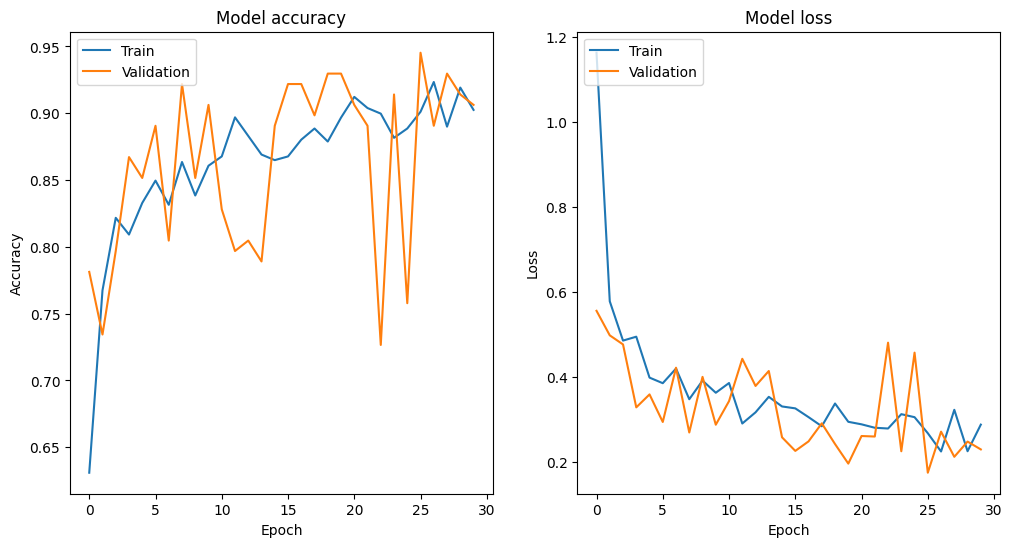

In [ ]:
import matplotlib.pyplot as plt # This line imports the Matplotlib library and aliases it as plt, allowing access to its functionality for creating plots.

plt.figure(figsize=(12, 6)) # This line creates a new figure with a specified figure size of 12 inches in width and 6 inches in height.
plt.subplot(1, 2, 1) # This line creates a subplot grid with 1 row and 2 columns and selects the first subplot for plotting. Subplots are indexed starting from 1, so (1, 2, 1) refers to the first subplot.
plt.plot(history.history['accuracy']) # This line plots the training accuracy values stored in the accuracy key of the history.history dictionary. These values represent the accuracy of the model on the training data across epochs.
plt.plot(history.history['val_accuracy']) # This line plots the validation accuracy values stored in the val_accuracy key of the history.history dictionary. These values represent the accuracy of the model on the validation data across epochs.
plt.title('Model accuracy') # This line sets the title of the first subplot to 'Model accuracy'.
plt.ylabel('Accuracy') # This line sets the label for the y-axis of the first subplot to 'Accuracy'.
plt.xlabel('Epoch') # This line sets the label for the x-axis of the first subplot to 'Epoch'.
plt.legend(['Train', 'Validation'], loc='upper left') # This line adds a legend to the first subplot indicating the line colors corresponding to 'Train' and 'Validation' data. It's positioned at the upper left corner of the plot.

plt.subplot(1, 2, 2) # This line selects the second subplot for plotting in the same subplot grid created earlier.
plt.plot(history.history['loss']) # This line plots the training loss values stored in the loss key of the history.history dictionary. These values represent the loss of the model on the training data across epochs.
plt.plot(history.history['val_loss']) # This line plots the validation loss values stored in the val_loss key of the history.history dictionary. These values represent the loss of the model on the validation data across epochs.
plt.title('Model loss') # This line sets the title of the second subplot to 'Model loss'.
plt.ylabel('Loss') # This line sets the label for the y-axis of the second subplot to 'Loss'.
plt.xlabel('Epoch') # This line sets the label for the x-axis of the second subplot to 'Epoch'.
plt.legend(['Train', 'Validation'], loc='upper left') # This line adds a legend to the second subplot indicating the line colors corresponding to 'Train' and 'Validation' data. It's positioned at the upper left corner of the plot.

plt.show() # This line displays the entire figure containing the two subplots.


# **Step 6. Evaluate the model on the test set**



In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) 

# This line creates an ImageDataGenerator object named test_datagen for preprocessing the test images. 
# Only rescaling is applied here by dividing pixel values by 255 to bring them into the range [0, 1].

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# This line creates a generator for yielding batches of test data. It uses the flow_from_directory method of the test_datagen object.
# test_dir: Specifies the directory containing the test images.
# target_size=(224, 224): Resizes the images to have a width and height of 224 pixels.
# batch_size=32: Sets the batch size for test data to 32.
# class_mode='categorical': Indicates that the labels are provided in categorical format (one-hot encoded).

Found 166 images belonging to 5 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator) # This line evaluates the model on the test data generator (test_generator) using the evaluate() method. It returns the test loss and test accuracy, which are stored in the variables test_loss and test_accuracy, respectively.

print(f'Test Accuracy: {test_accuracy}') # This line prints the test accuracy to the console. It uses an f-string to format the output, inserting the value of test_accuracy into the string.
print(f'Test Loss: {test_loss}') # This line prints the test loss to the console using an f-string, inserting the value of test_loss into the string.

6/6 [==============================] - 3s 492ms/step - loss: 0.3931 - accuracy: 0.9036
Test Accuracy: 0.9036144614219666
Test Loss: 0.39309361577033997


# **Part II**
# **DenseNet169**


# **Step 1. Import Necessary Libraries**



In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# **Step 2. Set Up Dataset Paths**



In [ ]:
train_dir = '/content/train'
validation_dir = '/content/validation'
test_dir = '/content/test'


# **Step 3. Data preprocessing**



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 750 images belonging to 5 classes.
Found 159 images belonging to 5 classes.



# **Step 4. Model creation**



In [ ]:
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

51877672/51877672 [==============================] - 0s 0us/step



# **Step 5. Freeze the base model layers**



In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# **Step 6. Train the Model**



In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30
23/23 [==============================] - 44s 1s/step - loss: 0.9006 - accuracy: 0.6602 - val_loss: 0.4840 - val_accuracy: 0.8203
Epoch 2/30
23/23 [==============================] - 20s 858ms/step - loss: 0.5425 - accuracy: 0.7799 - val_loss: 0.4396 - val_accuracy: 0.8438
Epoch 3/30
23/23 [==============================] - 20s 892ms/step - loss: 0.4625 - accuracy: 0.8203 - val_loss: 0.4198 - val_accuracy: 0.8750
Epoch 4/30
23/23 [==============================] - 23s 1s/step - loss: 0.4785 - accuracy: 0.8078 - val_loss: 0.3523 - val_accuracy: 0.8594
Epoch 5/30
23/23 [==============================] - 20s 852ms/step - loss: 0.3709 - accuracy: 0.8552 - val_loss: 0.2881 - val_accuracy: 0.9062
Epoch 6/30
23/23 [==============================] - 20s 892ms/step - loss: 0.3342 - accuracy: 0.8844 - val_loss: 0.2646 - val_accuracy: 0.9062
Epoch 7/30
23/23 [==============================] - 23s 991ms/step - loss: 0.3213 - accuracy: 0.8816 - val_loss: 0.2477 - val_accuracy: 0.9219
Epoch

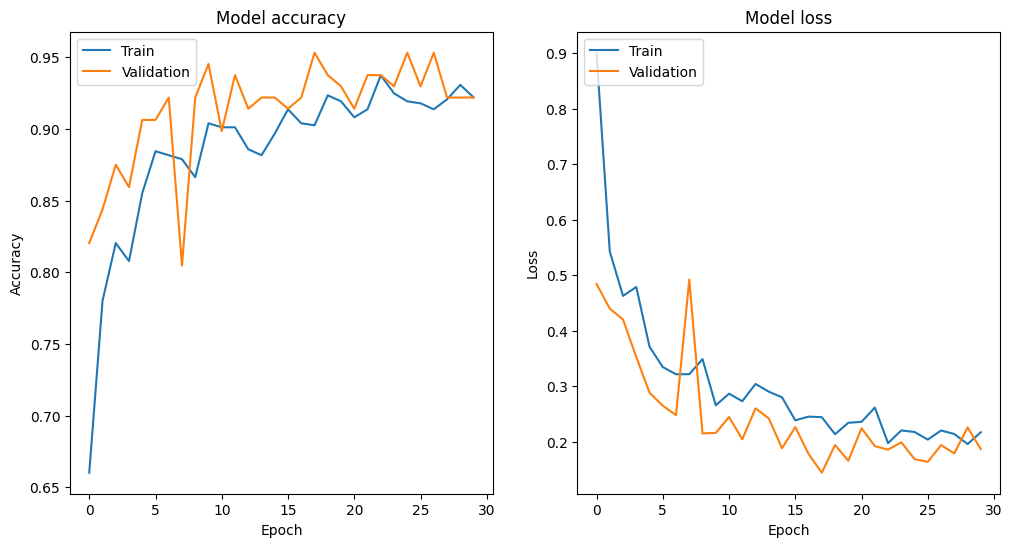

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# **Step 7. Evaluate the model on the test set**



In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 166 images belonging to 5 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

6/6 [==============================] - 6s 1s/step - loss: 0.1973 - accuracy: 0.9277
Test Accuracy: 0.9277108311653137
Test Loss: 0.1973128467798233
